# Results - Symbiodinium CCMP2548 Variant Analysis

Quality control and exploratory analysis of data obtained during variant calling.

# Metrics and Results

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

pd.set_option("display.max_columns",30)
              
              
%matplotlib inline

PATH = "C:/Users/chris/OneDrive/Symbiodinium/script_summaries/"

## Alignment Metrics Results

When using Picard Tools to mark duplicates, a number of alignment metrics were collected and stored in *alignment_metrics_formatted.txt*. Summary data is tabulated below.

In [2]:
alignment_metrics = pd.read_csv(PATH + '/metrics/alignment_metrics_formatted.txt', sep='\t')
alignment_metrics.set_index('CATEGORY', inplace=True)
alignment_metrics.dropna(axis=1,inplace=True)

#alignment_metrics  #uncomment for full dataframe straight from file

### All libraries analysed together

In [3]:
#format significant figures
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.6f}'.format(x)
print (alignment_metrics.iloc[2]) #select the second row as this contains information about pairs

TOTAL_READS                     1025797816
PF_READS                        1025797816
PCT_PF_READS                             1
PF_NOISE_READS                           0
PF_READS_ALIGNED                1013300670
PCT_PF_READS_ALIGNED              0.987817
PF_ALIGNED_BASES              130174241716
PF_HQ_ALIGNED_READS              949863524
PF_HQ_ALIGNED_BASES           123092829991
PF_HQ_ALIGNED_Q20_BASES       122506186786
PF_HQ_MEDIAN_MISMATCHES                  0
PF_MISMATCH_RATE                  0.002387
PF_HQ_ERROR_RATE                  0.001638
PF_INDEL_RATE                     0.000207
MEAN_READ_LENGTH                131.044657
READS_ALIGNED_IN_PAIRS          1010808192
PCT_READS_ALIGNED_IN_PAIRS        0.997540
PF_READS_IMPROPER_PAIRS          106820974
PCT_PF_READS_IMPROPER_PAIRS       0.105419
BAD_CYCLES                               0
STRAND_BALANCE                    0.499956
PCT_CHIMERAS                      0.103698
PCT_ADAPTER                              0
Name: PAIR,

A quick look at our summary data above we can see a few things:

- All reads passed the QC filter (PCT_PF_READS) suggesting our trimming was sufficient
- Nearly all of our reads aligned (PCT_PF_READS_ALIGNED). This is good, we likely have good quality data
- Most quality metrics are good; 0 bad cycles, 0% noise reads, and near 50% strand balance.

- 10% Chimeric reads seems a little high, but other individuals have reported similar rates. This may be caused by a high level of genome duplication in CCMP2548, although it could have many potential causes

### Individual Libraries

Picard was also run on each BAM file before merging to obtain metrics for each library for comparison below. Each metric file has been merged into a single pandas dataframe below.

In [9]:
alignment_metrics_400bp_L6 = pd.read_csv(PATH + '/metrics_individual/formatted/formatted_alignment_metrics_CCMP2548_L6_PE400bp_Apr2018.txt', sep='\t')
alignment_metrics_400bp_L8 = pd.read_csv(PATH + '/metrics_individual/formatted/formatted_alignment_metrics_CCMP2548_L8_PE400bp_Apr2018.txt', sep='\t')
alignment_metrics_250bp_Jul = pd.read_csv(PATH + '/metrics_individual/formatted/formatted_alignment_metrics_CCMP2548_PE250bp_Jul2016.txt', sep='\t')
alignment_metrics_700bp_Apr = pd.read_csv(PATH + '/metrics_individual/formatted/formatted_alignment_metrics_CCMP2548_PE700bp_Apr2017.txt', sep='\t')
alignment_metrics_700bp_Dec = pd.read_csv(PATH + '/metrics_individual/formatted/formatted_alignment_metrics_CCMP2548_PE700bp_Dec2016.txt', sep='\t')
alignment_metrics_700bp_Mar = pd.read_csv(PATH + '/metrics_individual/formatted/formatted_alignment_metrics_CCMP2548_PE700bp_Mar2017.txt', sep='\t')



metrics = [alignment_metrics_400bp_L6.iloc[2:], alignment_metrics_400bp_L8.iloc[2:], \
          alignment_metrics_250bp_Jul.iloc[2:], alignment_metrics_700bp_Apr.iloc[2:], \
          alignment_metrics_700bp_Dec.iloc[2:], alignment_metrics_700bp_Mar.iloc[2:], \
          alignment_metrics.iloc[2:]]


compare_metrics = pd.concat(metrics)

#clean up data
compare_metrics.dropna(axis=1,inplace=True)
compare_metrics['LIBRARY'] = ['400bp_L6', '400bp_L8', '250bp_Jul', '700bp_Apr', '700bp_Dec', '700bp_Mar', 'all/merged']
compare_metrics.set_index('LIBRARY', inplace=True)

In [10]:
compare_metrics

,BAD_CYCLES,MEAN_READ_LENGTH,PCT_ADAPTER,PCT_CHIMERAS,PCT_PF_READS,PCT_PF_READS_ALIGNED,PCT_PF_READS_IMPROPER_PAIRS,PCT_READS_ALIGNED_IN_PAIRS,PF_ALIGNED_BASES,PF_HQ_ALIGNED_BASES,PF_HQ_ALIGNED_Q20_BASES,PF_HQ_ALIGNED_READS,PF_HQ_ERROR_RATE,PF_HQ_MEDIAN_MISMATCHES,PF_INDEL_RATE,PF_MISMATCH_RATE,PF_NOISE_READS,PF_READS,PF_READS_ALIGNED,PF_READS_IMPROPER_PAIRS,READS_ALIGNED_IN_PAIRS,STRAND_BALANCE,TOTAL_READS
LIBRARY,,,,,,,,,,,,,,,,,,,,,,,
400bp_L6,0,136.396476,0.000001,0.109866,1,0.881056,0.107371,0.995684,4765963248,4498816018,4481078084,33580272,0.002219,0,0.000222,0.002986,0,40788644,35937066,3858608,35781948,0.500188,40788644
400bp_L8,0,136.669048,0.000001,0.109017,1,0.882758,0.106246,0.995771,4784691129,4518377512,4501623317,33663991,0.002368,0,0.000222,0.003131,0,40797812,36014605,3826395,35862314,0.500158,40797812
250bp_Jul,0,139.268763,0,0.073854,1,0.996664,0.089318,0.998013,28488127417,27133415259,27059807639,197160883,0.001690,0,0.000243,0.002371,0,209707364,209007743,18668081,208592370,0.500109,209707364
700bp_Apr,0,130.023957,0,0.116386,1,0.997113,0.114319,0.997617,39255250552,36978174032,36810228288,287268897,0.001477,0,0.000202,0.002273,0,308439128,307548790,35158802,306815862,0.500257,308439128
700bp_Dec,0,128.978070,0,0.110597,1,0.997069,0.108754,0.997600,31654321674,29900538566,29746759493,234129479,0.001616,0,0.000194,0.002379,0,250593584,249859106,27173238,249259394,0.500195,250593584
700bp_Mar,0,123.409703,0,0.104829,1,0.996934,0.103673,0.997502,21225887696,20063508604,19906689965,164060002,0.001605,0,0.000179,0.002328,0,175471284,174933360,18135850,174496304,0.498815,175471284
all/merged,0,131.044657,0,0.103698,1,0.987817,0.105419,0.997540,130174241716,123092829991,122506186786,949863524,0.001638,0,0.000207,0.002387,0,1025797816,1013300670,106820974,1010808192,0.499956,1025797816


Some key points here:
- The 400bp library which was sequenced most recently appears to be of the lowest quality; only 88% of reads aligned. This is of course still useful, as it contributes nearly 80M reads.
- We also see that chimeric reads are consistently around 10% in all sequencing runs, suggesting this is unlikely to have come from any particular error/artifact of sequencing itself. The smaller 250bp run has less (~7%) as expected, given it's less likely for short reads to get split up

In [11]:
import warnings
warnings.filterwarnings('ignore')

pd.reset_option("all") ##reset pandas formatting which was messing with dataframes below

html.border has been deprecated, use display.html.border instead
(currently both are identical)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



## Insert Size Metrics Results
Quick quality control on insert size metrics for each library before proceeding.

In [14]:
insert_metrics = pd.read_csv(PATH + 'metrics/insert_metrics_all_formatted.txt', sep='\t')
insert_metrics.dropna(axis=1,inplace=True)
#insert_metrics

In [18]:
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.6f}'.format(x)
print ("Orientation is {}".format(insert_metrics.iloc[0]['PAIR_ORIENTATION']))

Orientation is FR


As expected, all reads are in FR orientation give they're all from paired-end libraries.

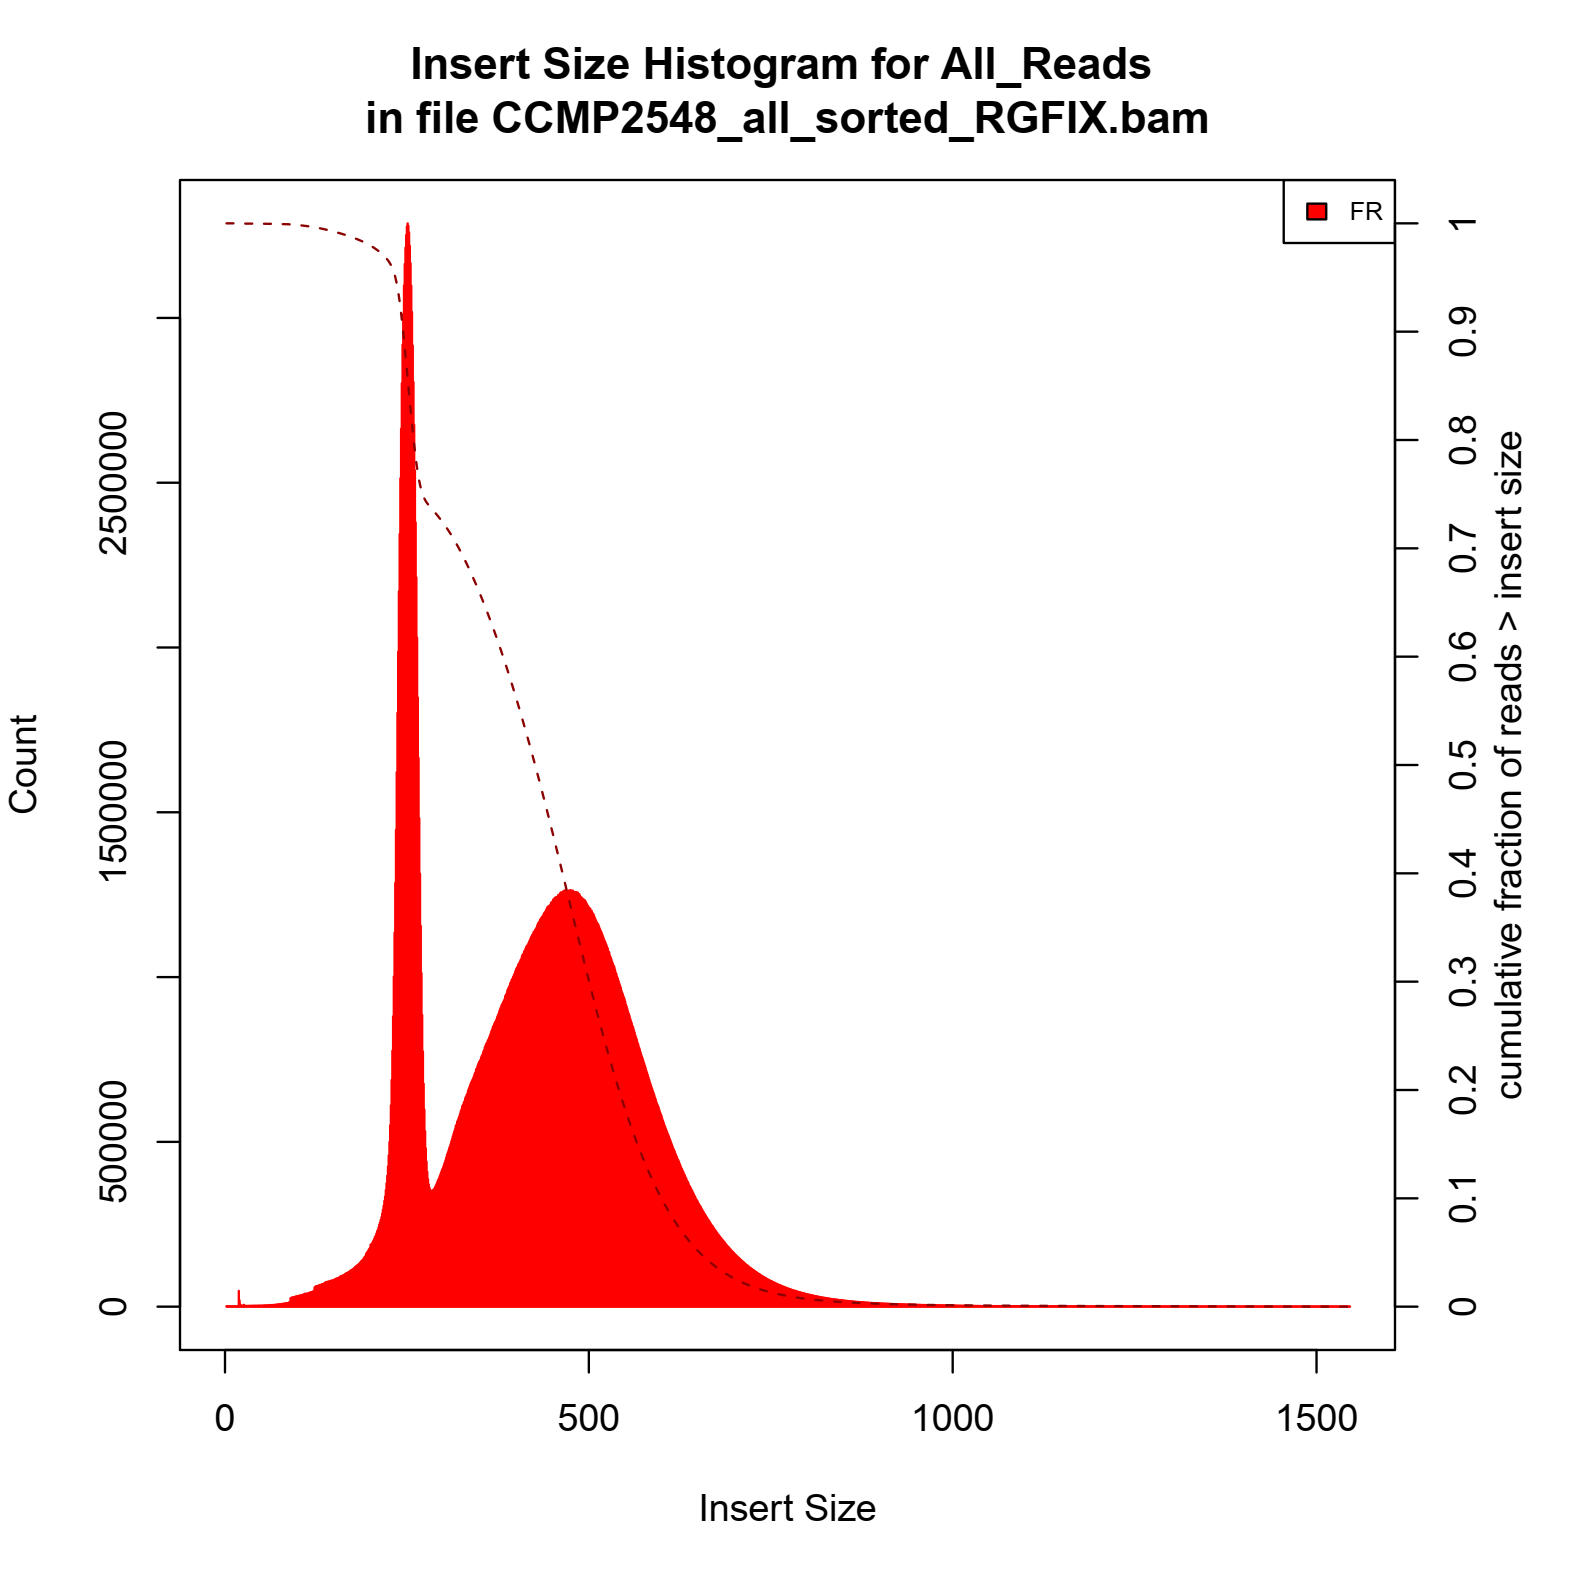

In [8]:
Image(filename = PATH + "/metrics/insert_size_histo_all.jpg", width=600, height=500)

Above: Insert size metrics for all libraries. We can see that our 250bp library contributes most of our reads and we saw earlier they were good quality.

## Insert Size Metrics Results: Individual Libraries

In [109]:
bp400_L6 = Image(filename = PATH + "/metrics_individual/formatted/ins_size_histo_CCMP2548_L6_PE400bp_Apr2018.jpg", width=350)
bp400_L8 = Image(filename = PATH + "/metrics_individual/formatted/ins_size_histo_CCMP2548_L8_PE400bp_Apr2018.jpg", width=350, height=250)
bp250_Jul = Image(filename = PATH + "/metrics_individual/formatted/ins_size_histo_CCMP2548_PE250bp_Jul2016.jpg", width=350, height=250)
bp700_Apr = Image(filename = PATH + "/metrics_individual/formatted/ins_size_histo_CCMP2548_PE700bp_Apr2017.jpg", width=350, height=250)
bp700_Dec = Image(filename = PATH + "/metrics_individual/formatted/ins_size_histo_CCMP2548_PE700bp_Dec2016.jpg", width=350, height=250)
bp700_Mar = Image(filename = PATH + "/metrics_individual/formatted/ins_size_histo_CCMP2548_PE700bp_Mar2017.jpg", width=350, height=250)


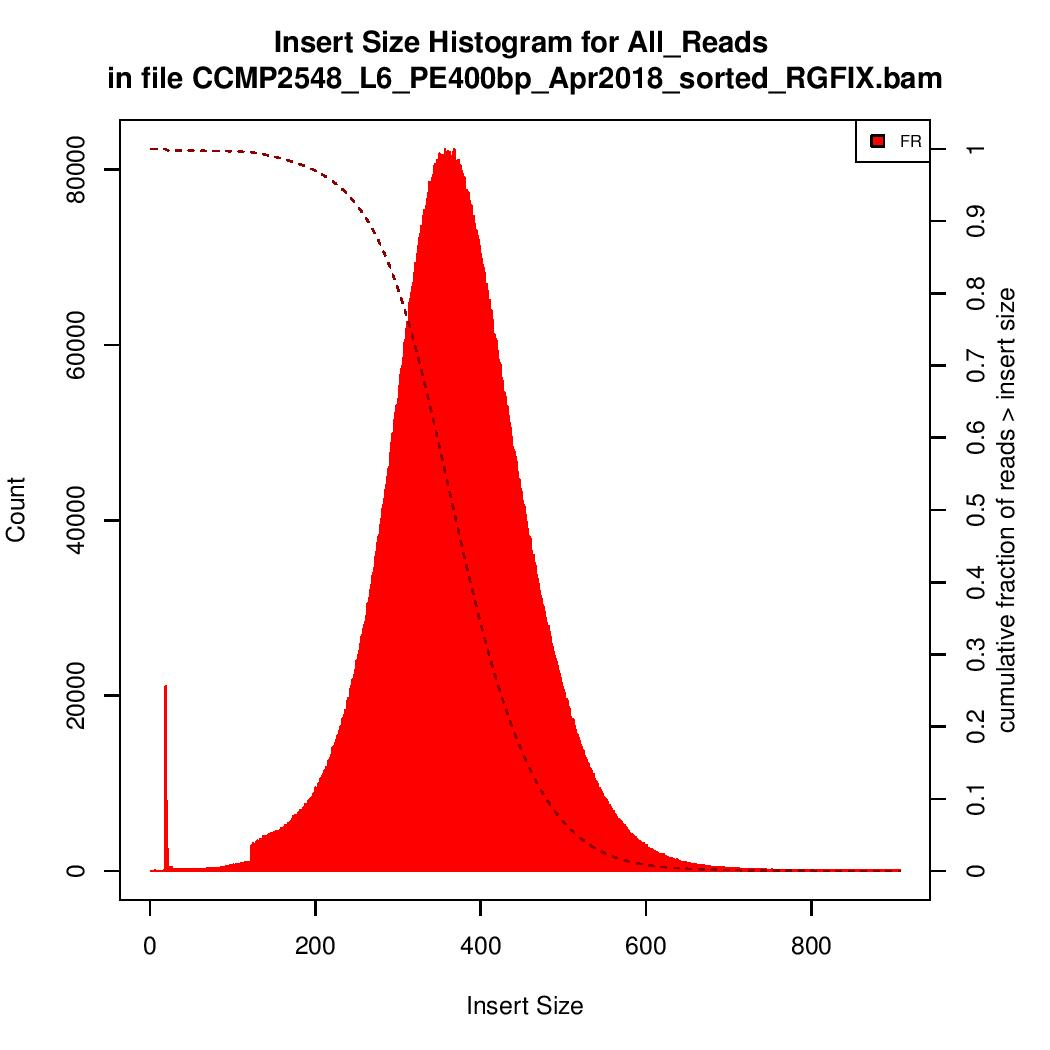

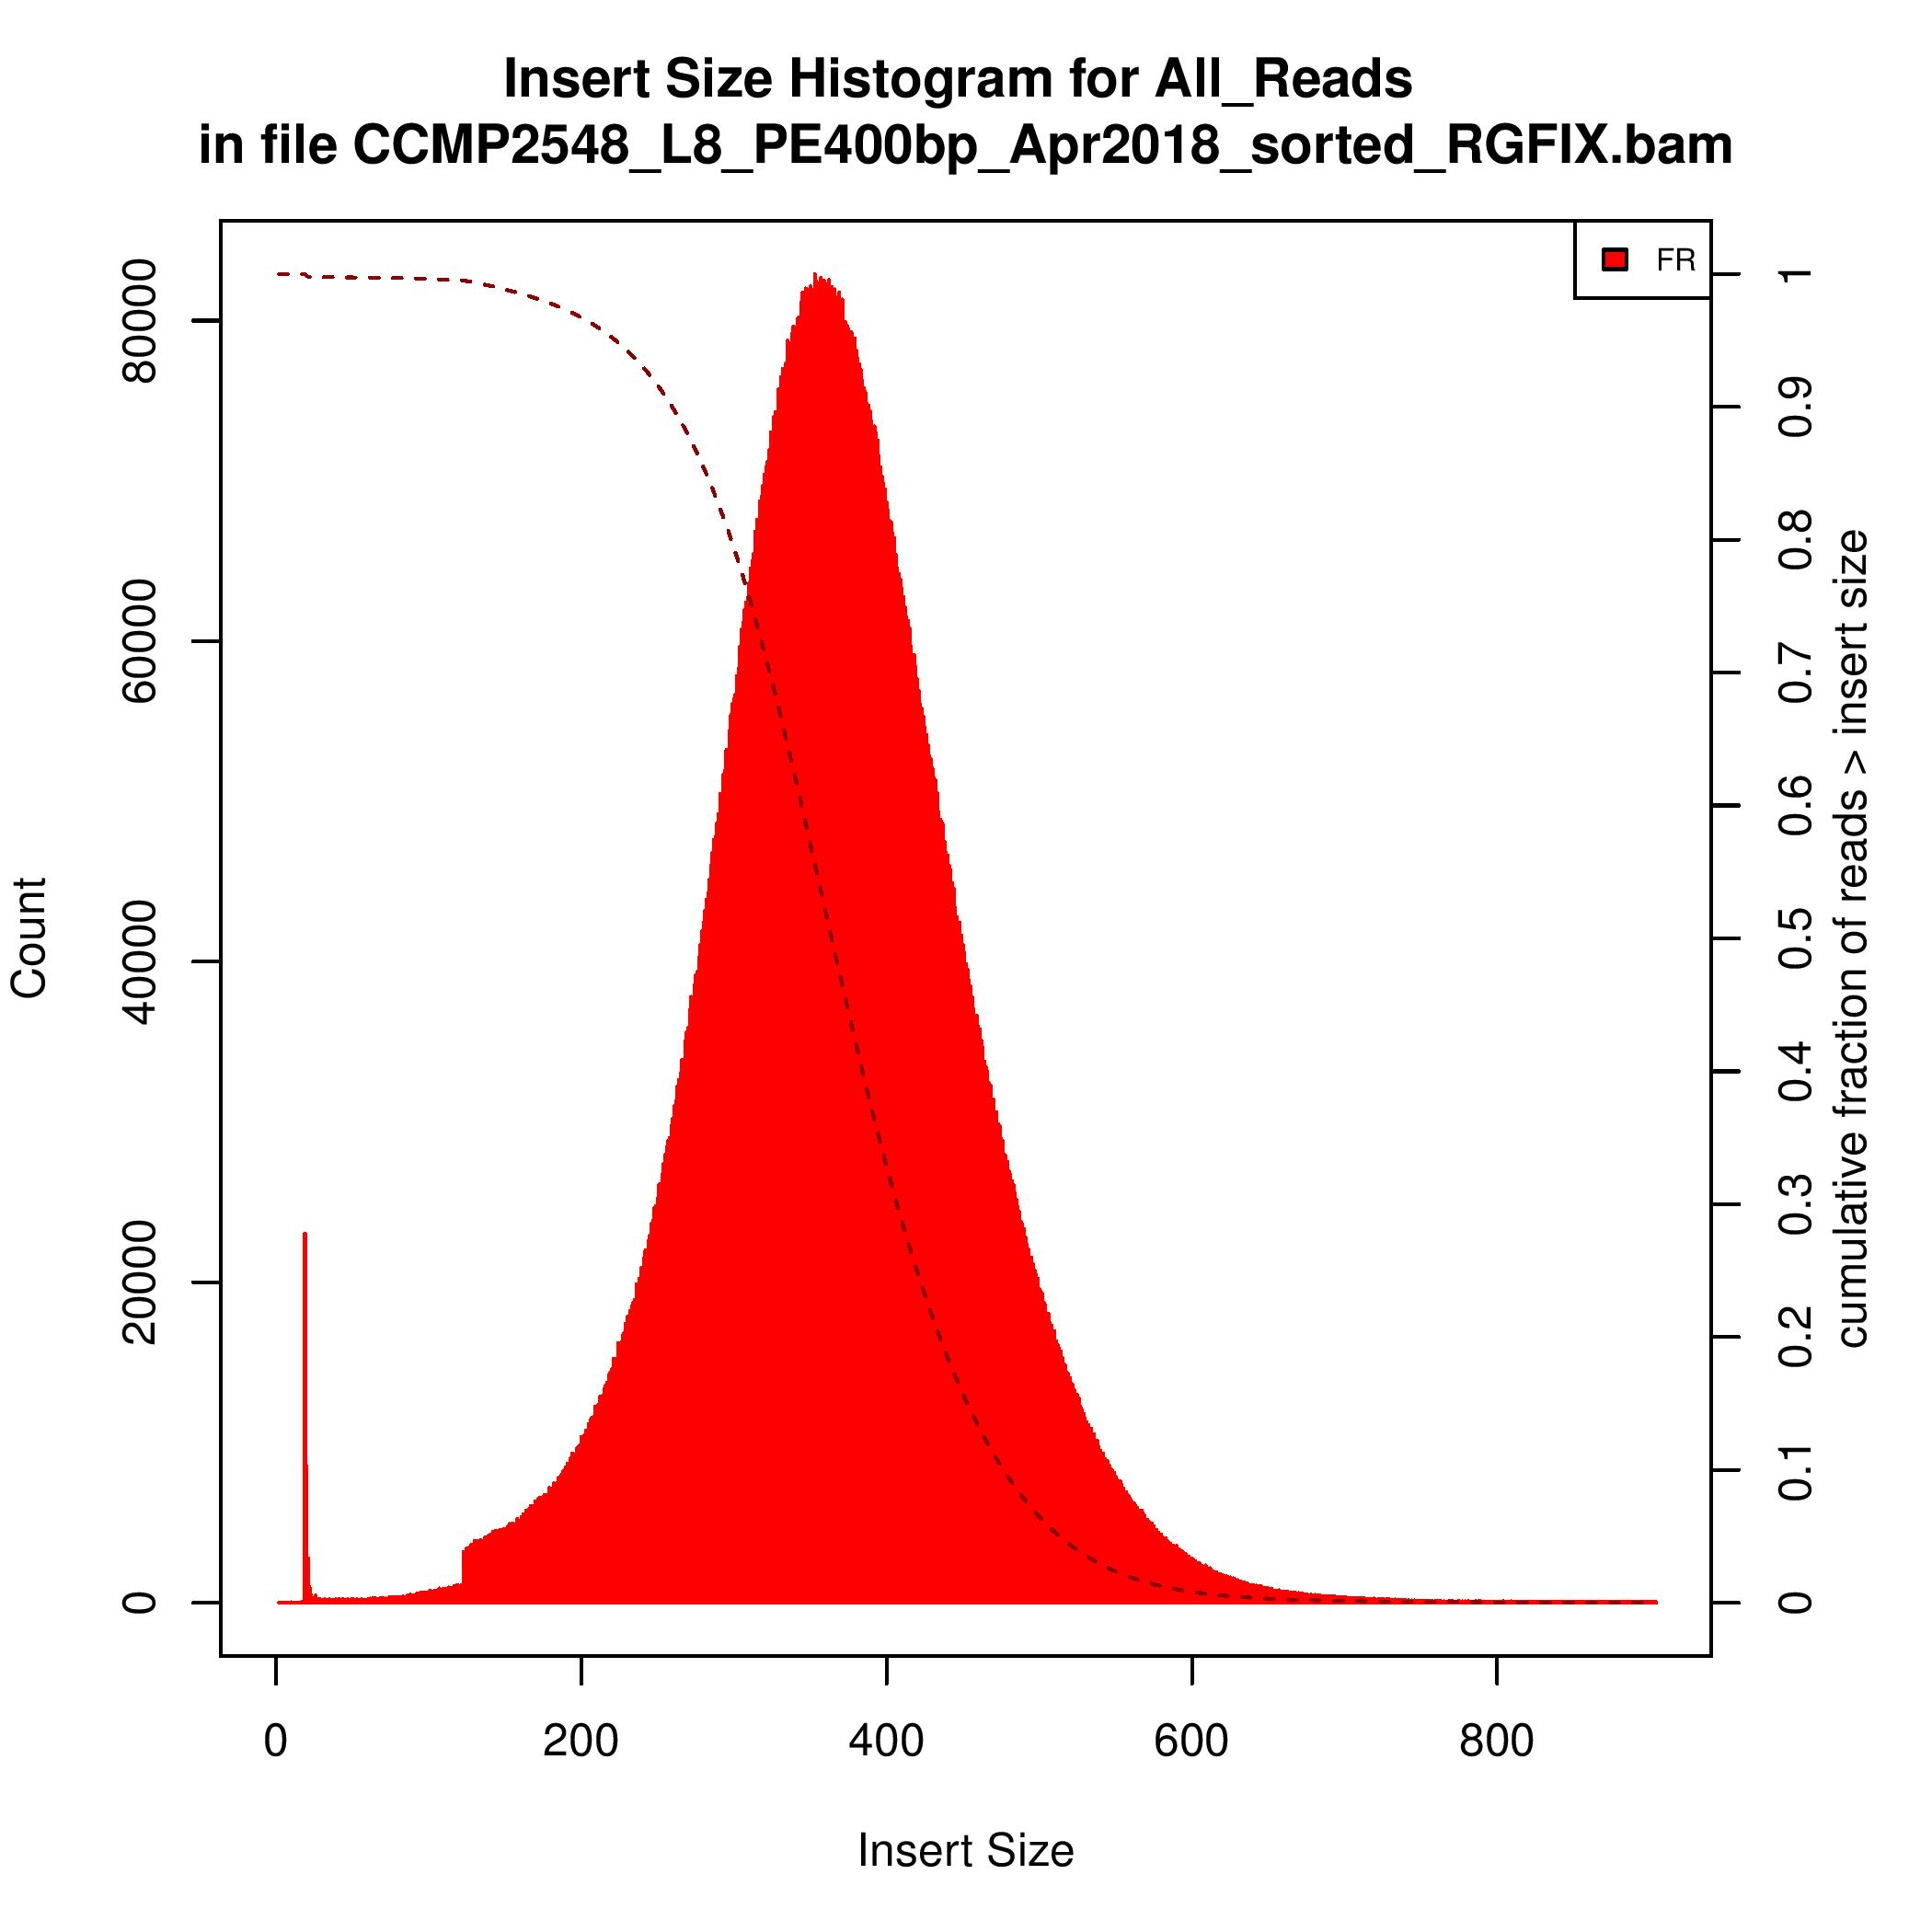

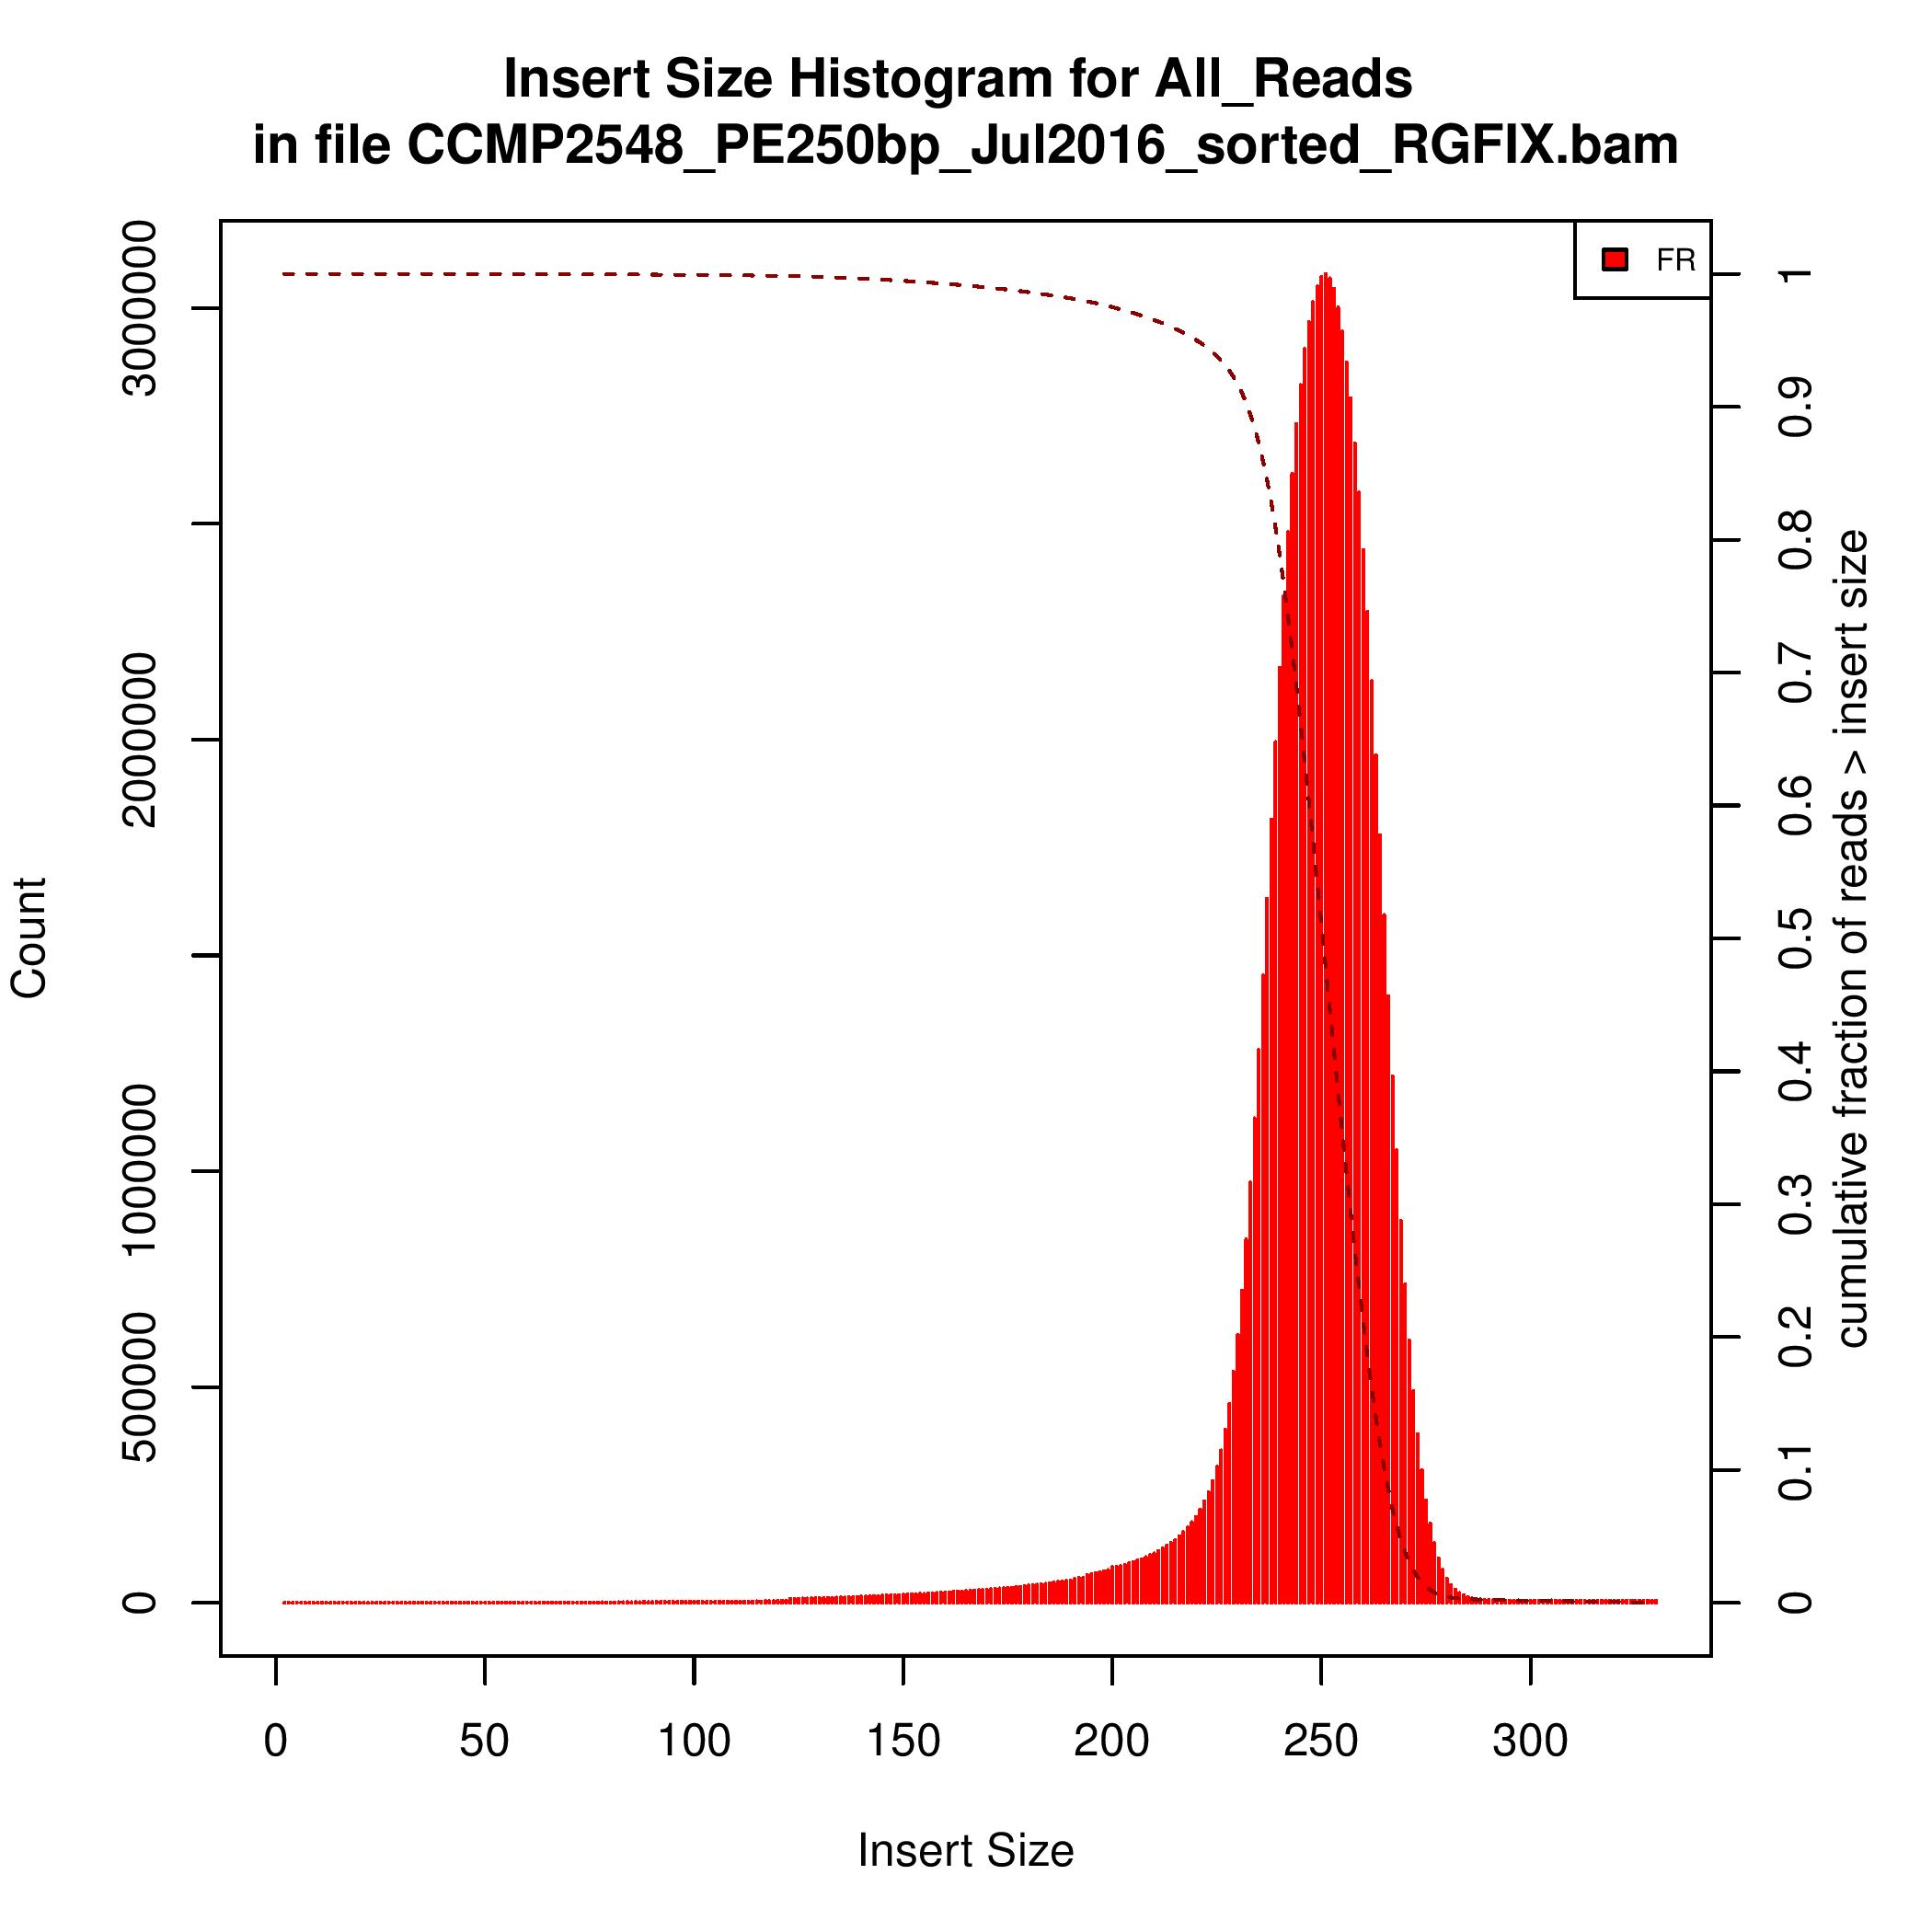

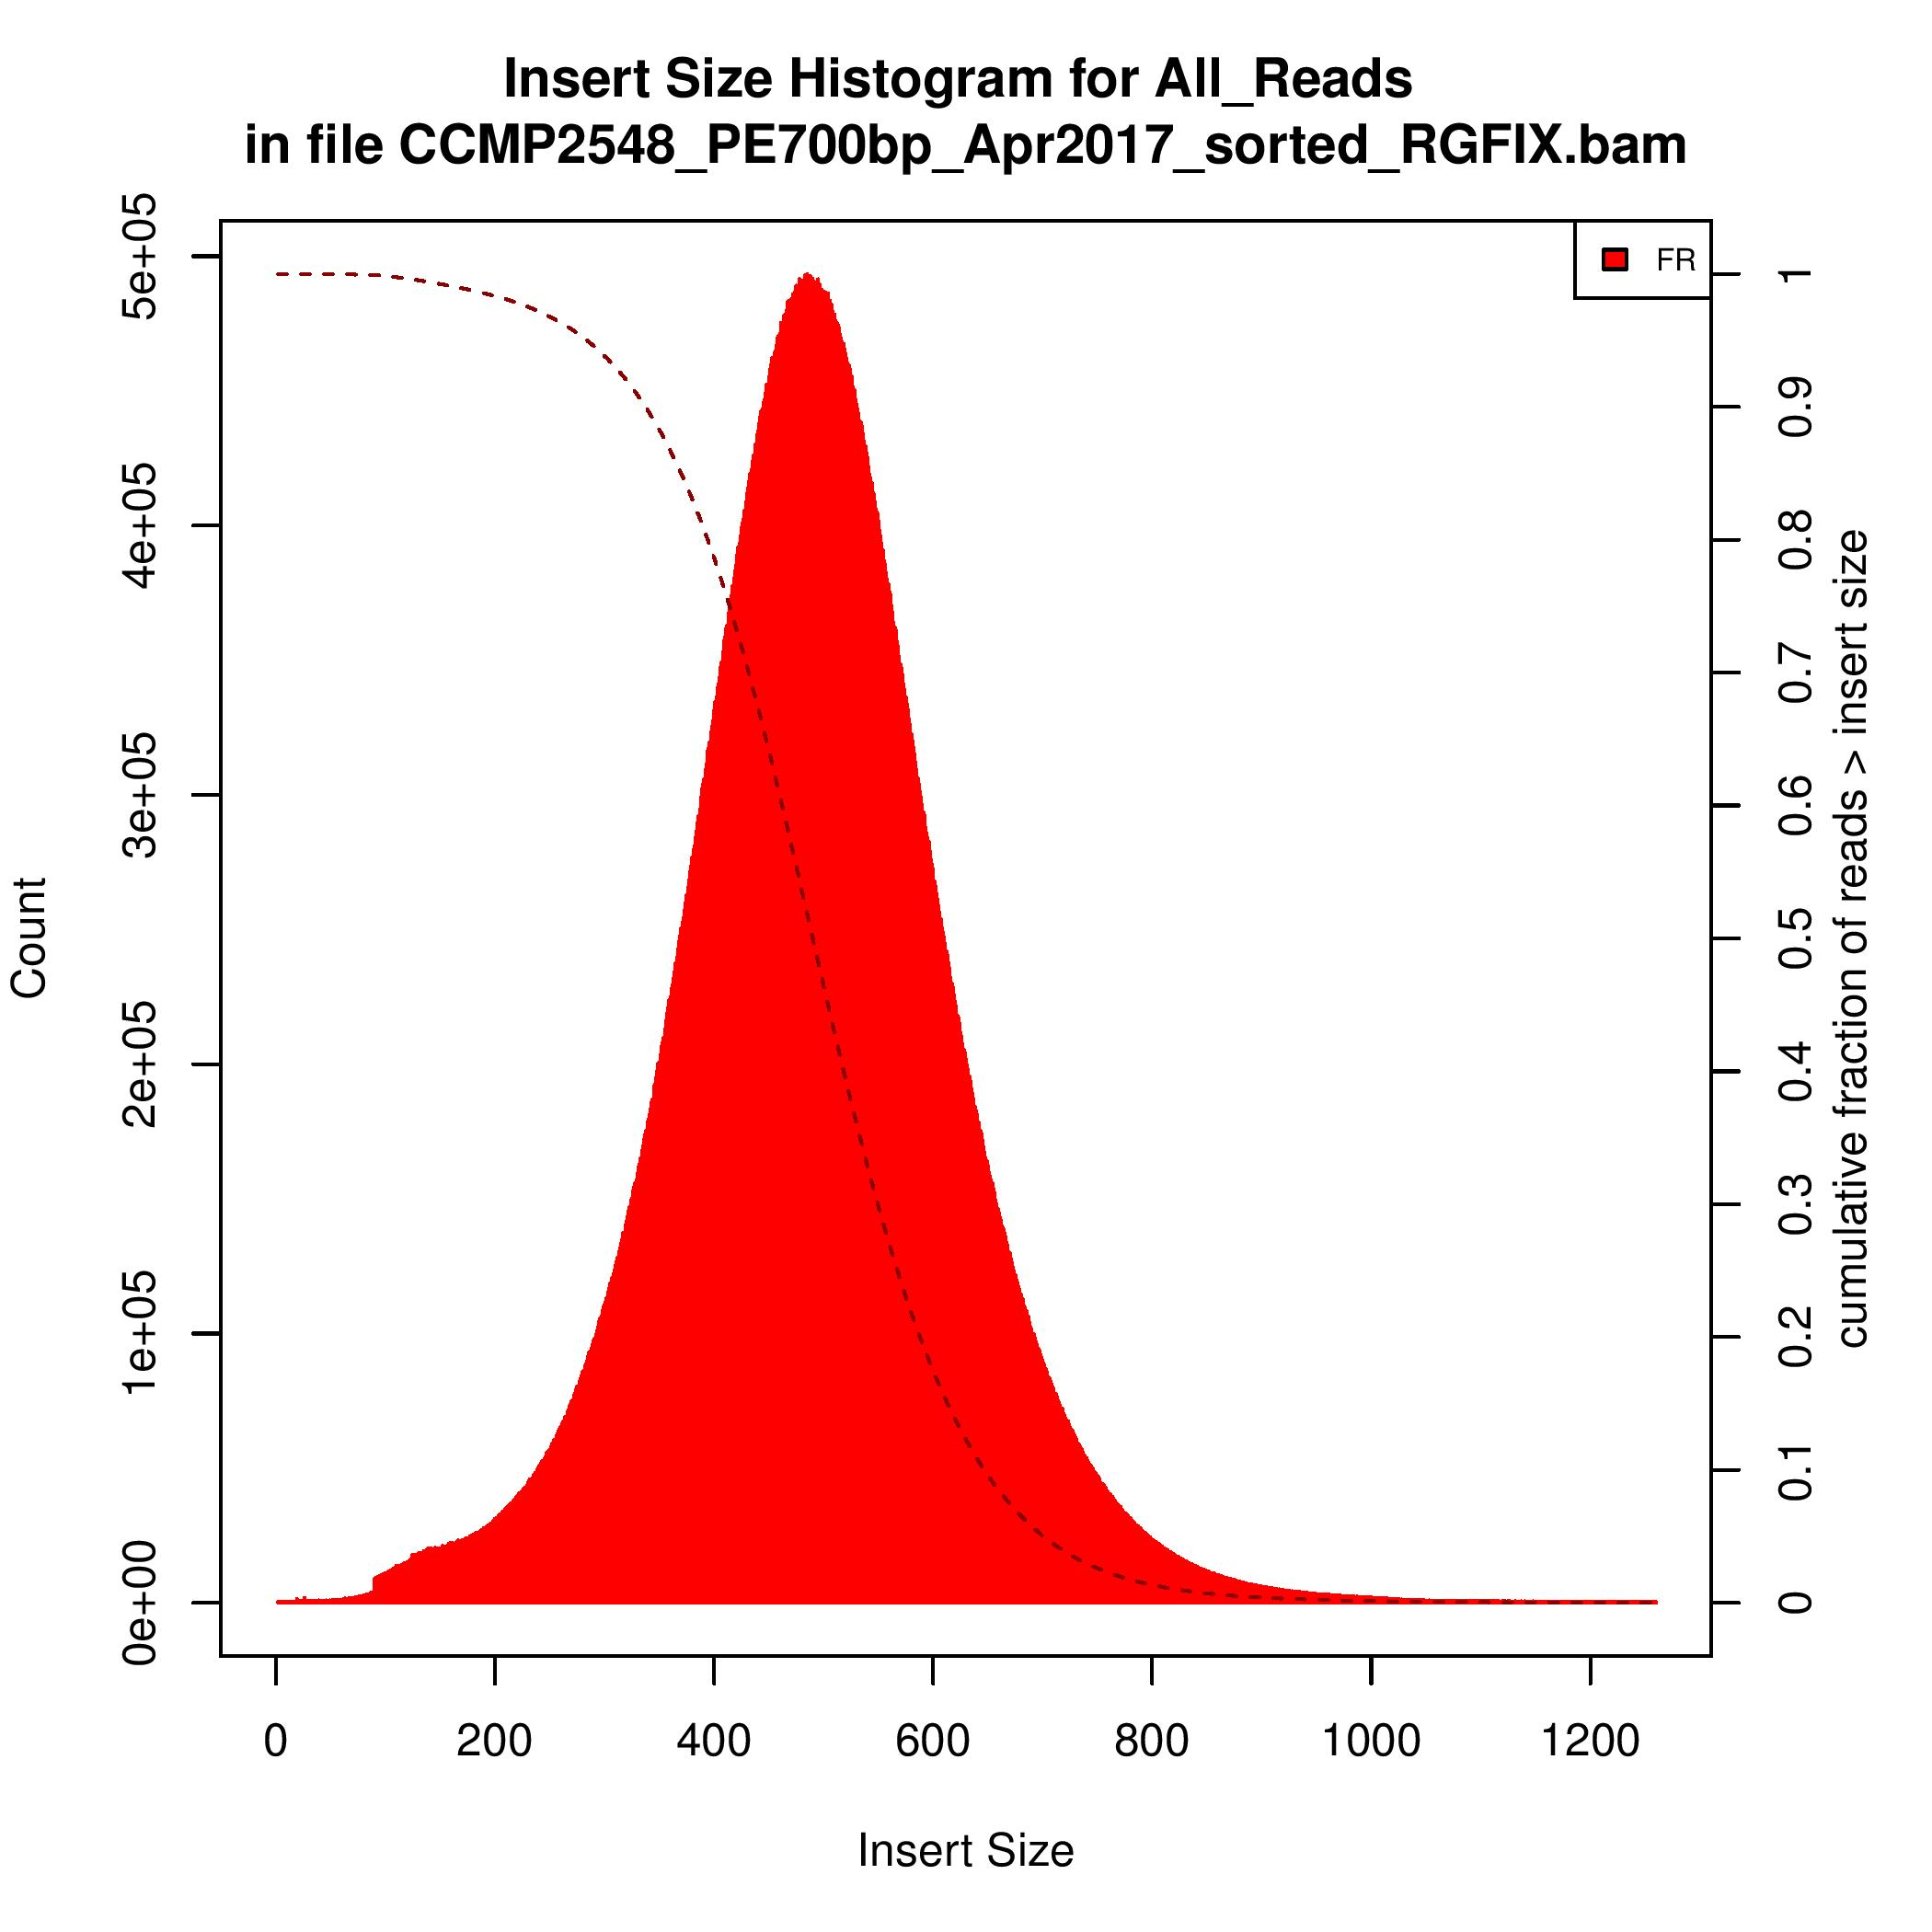

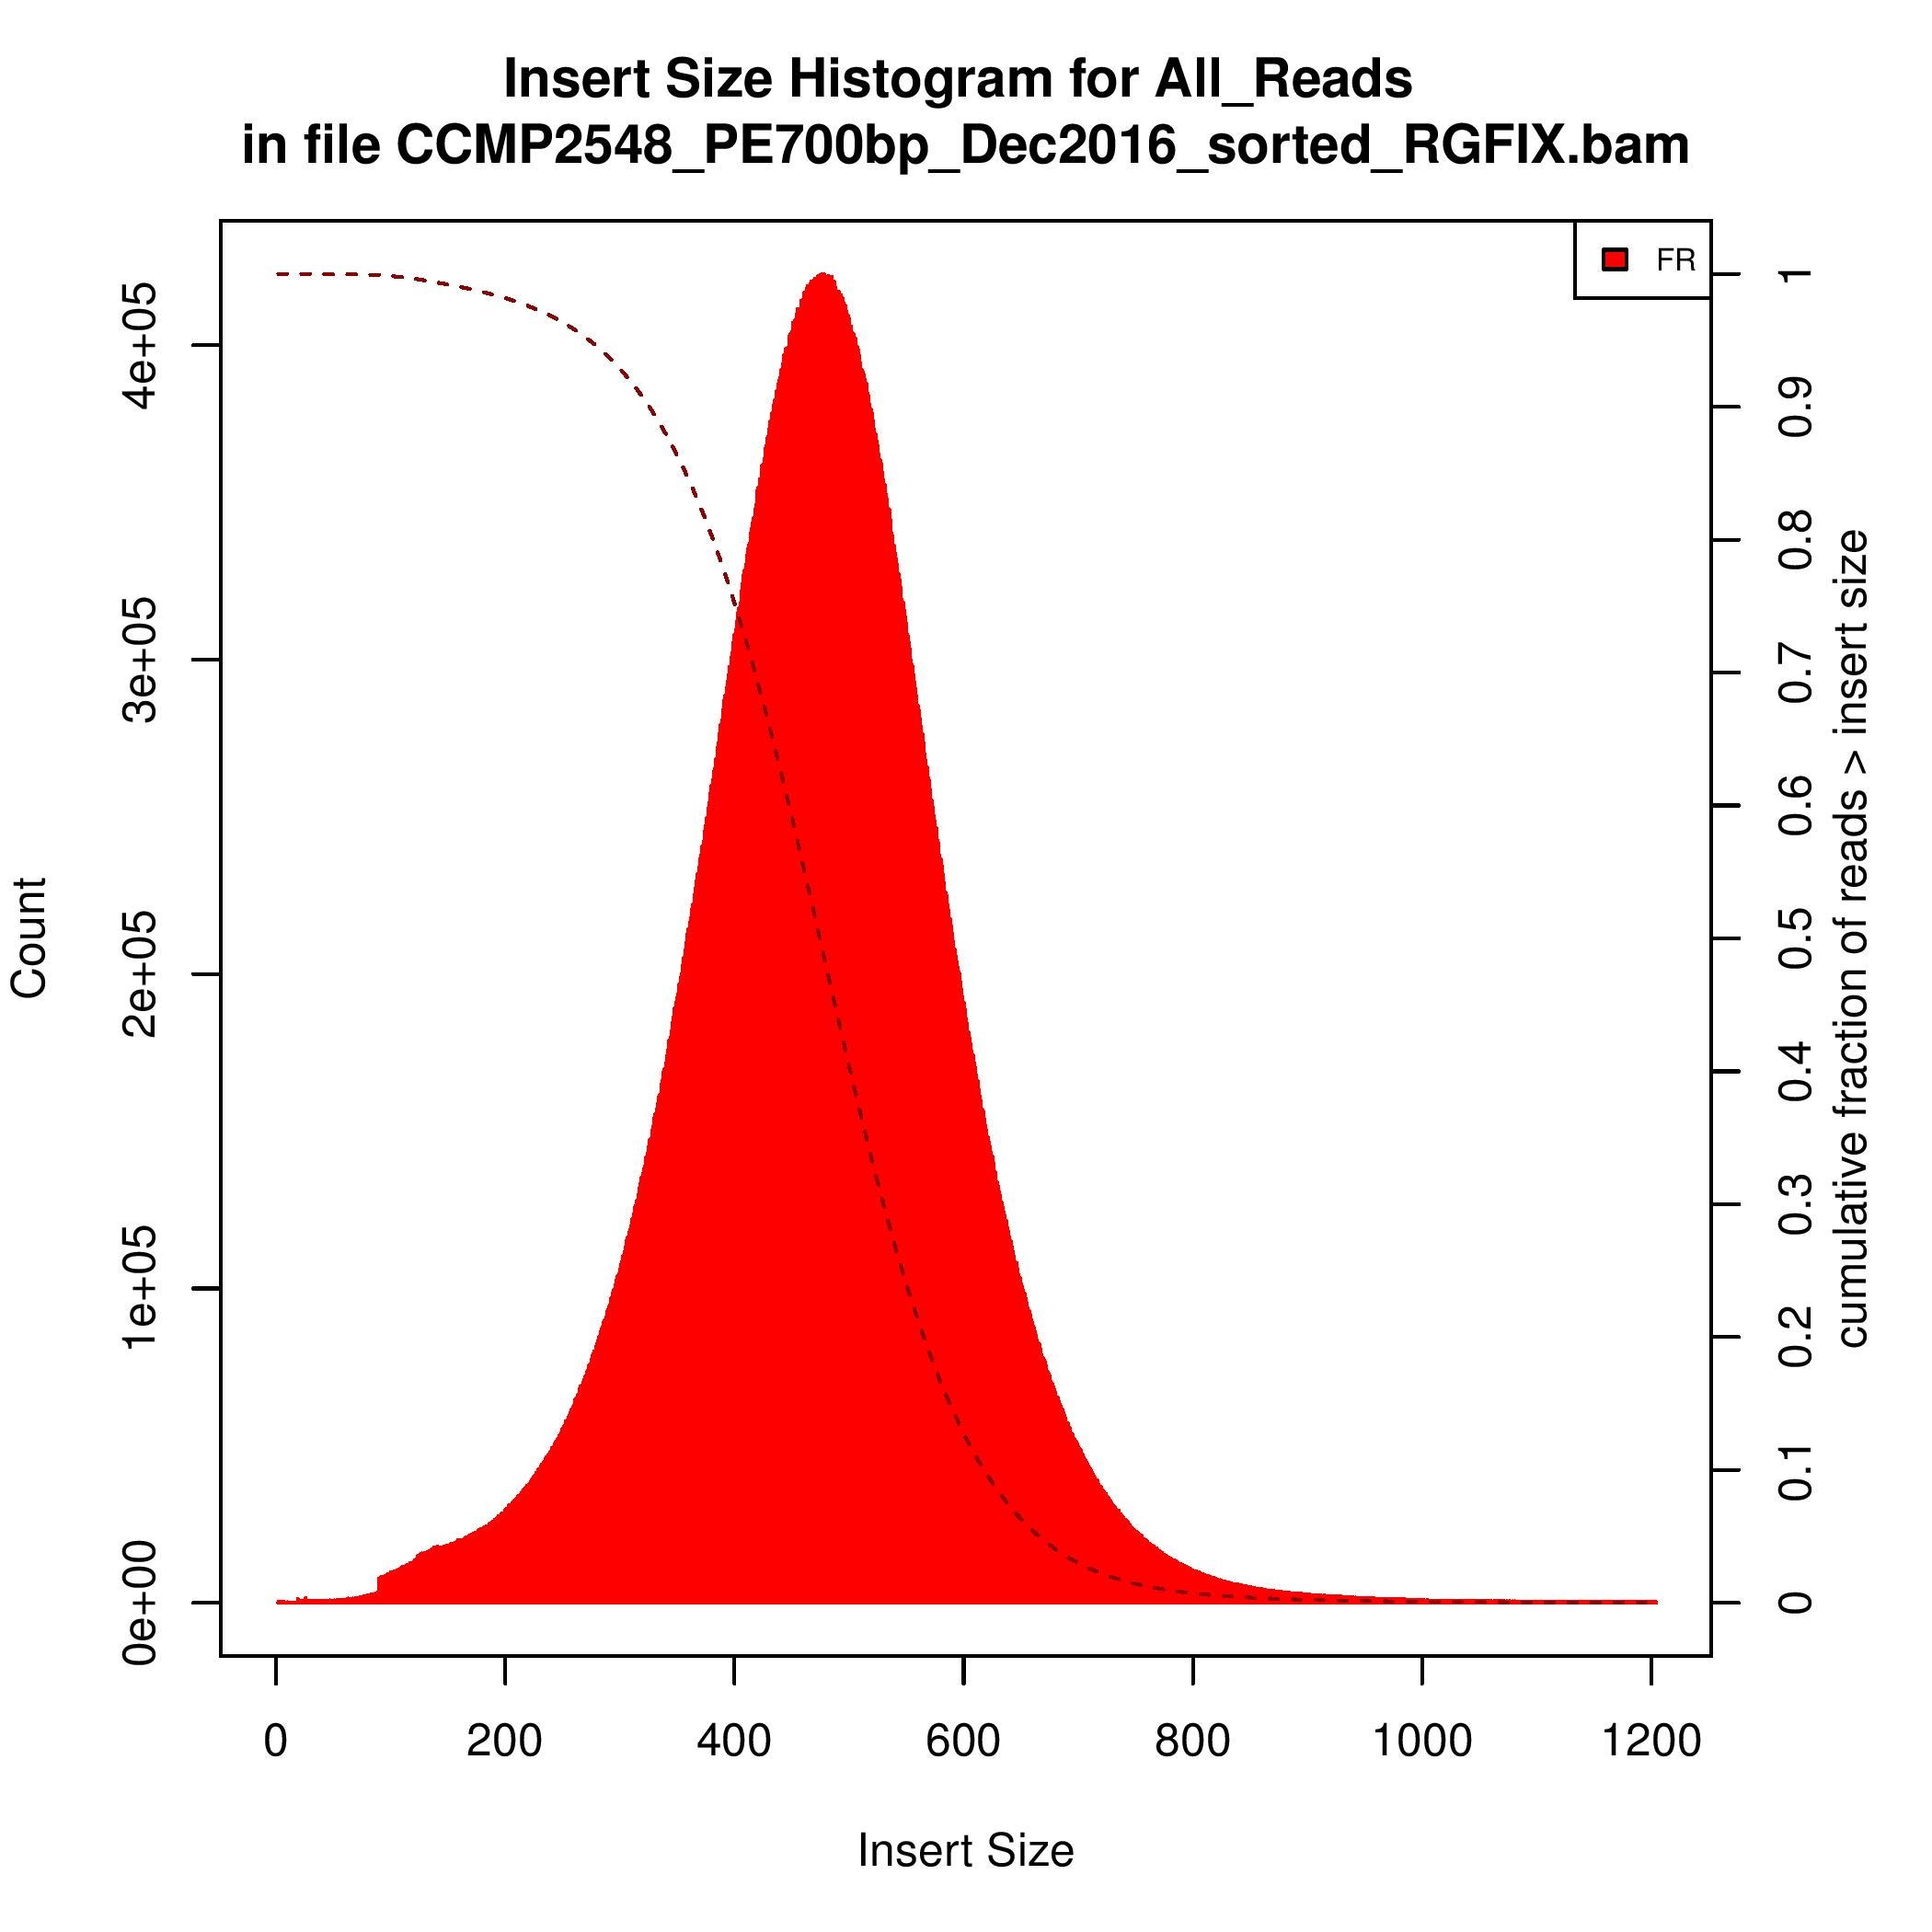

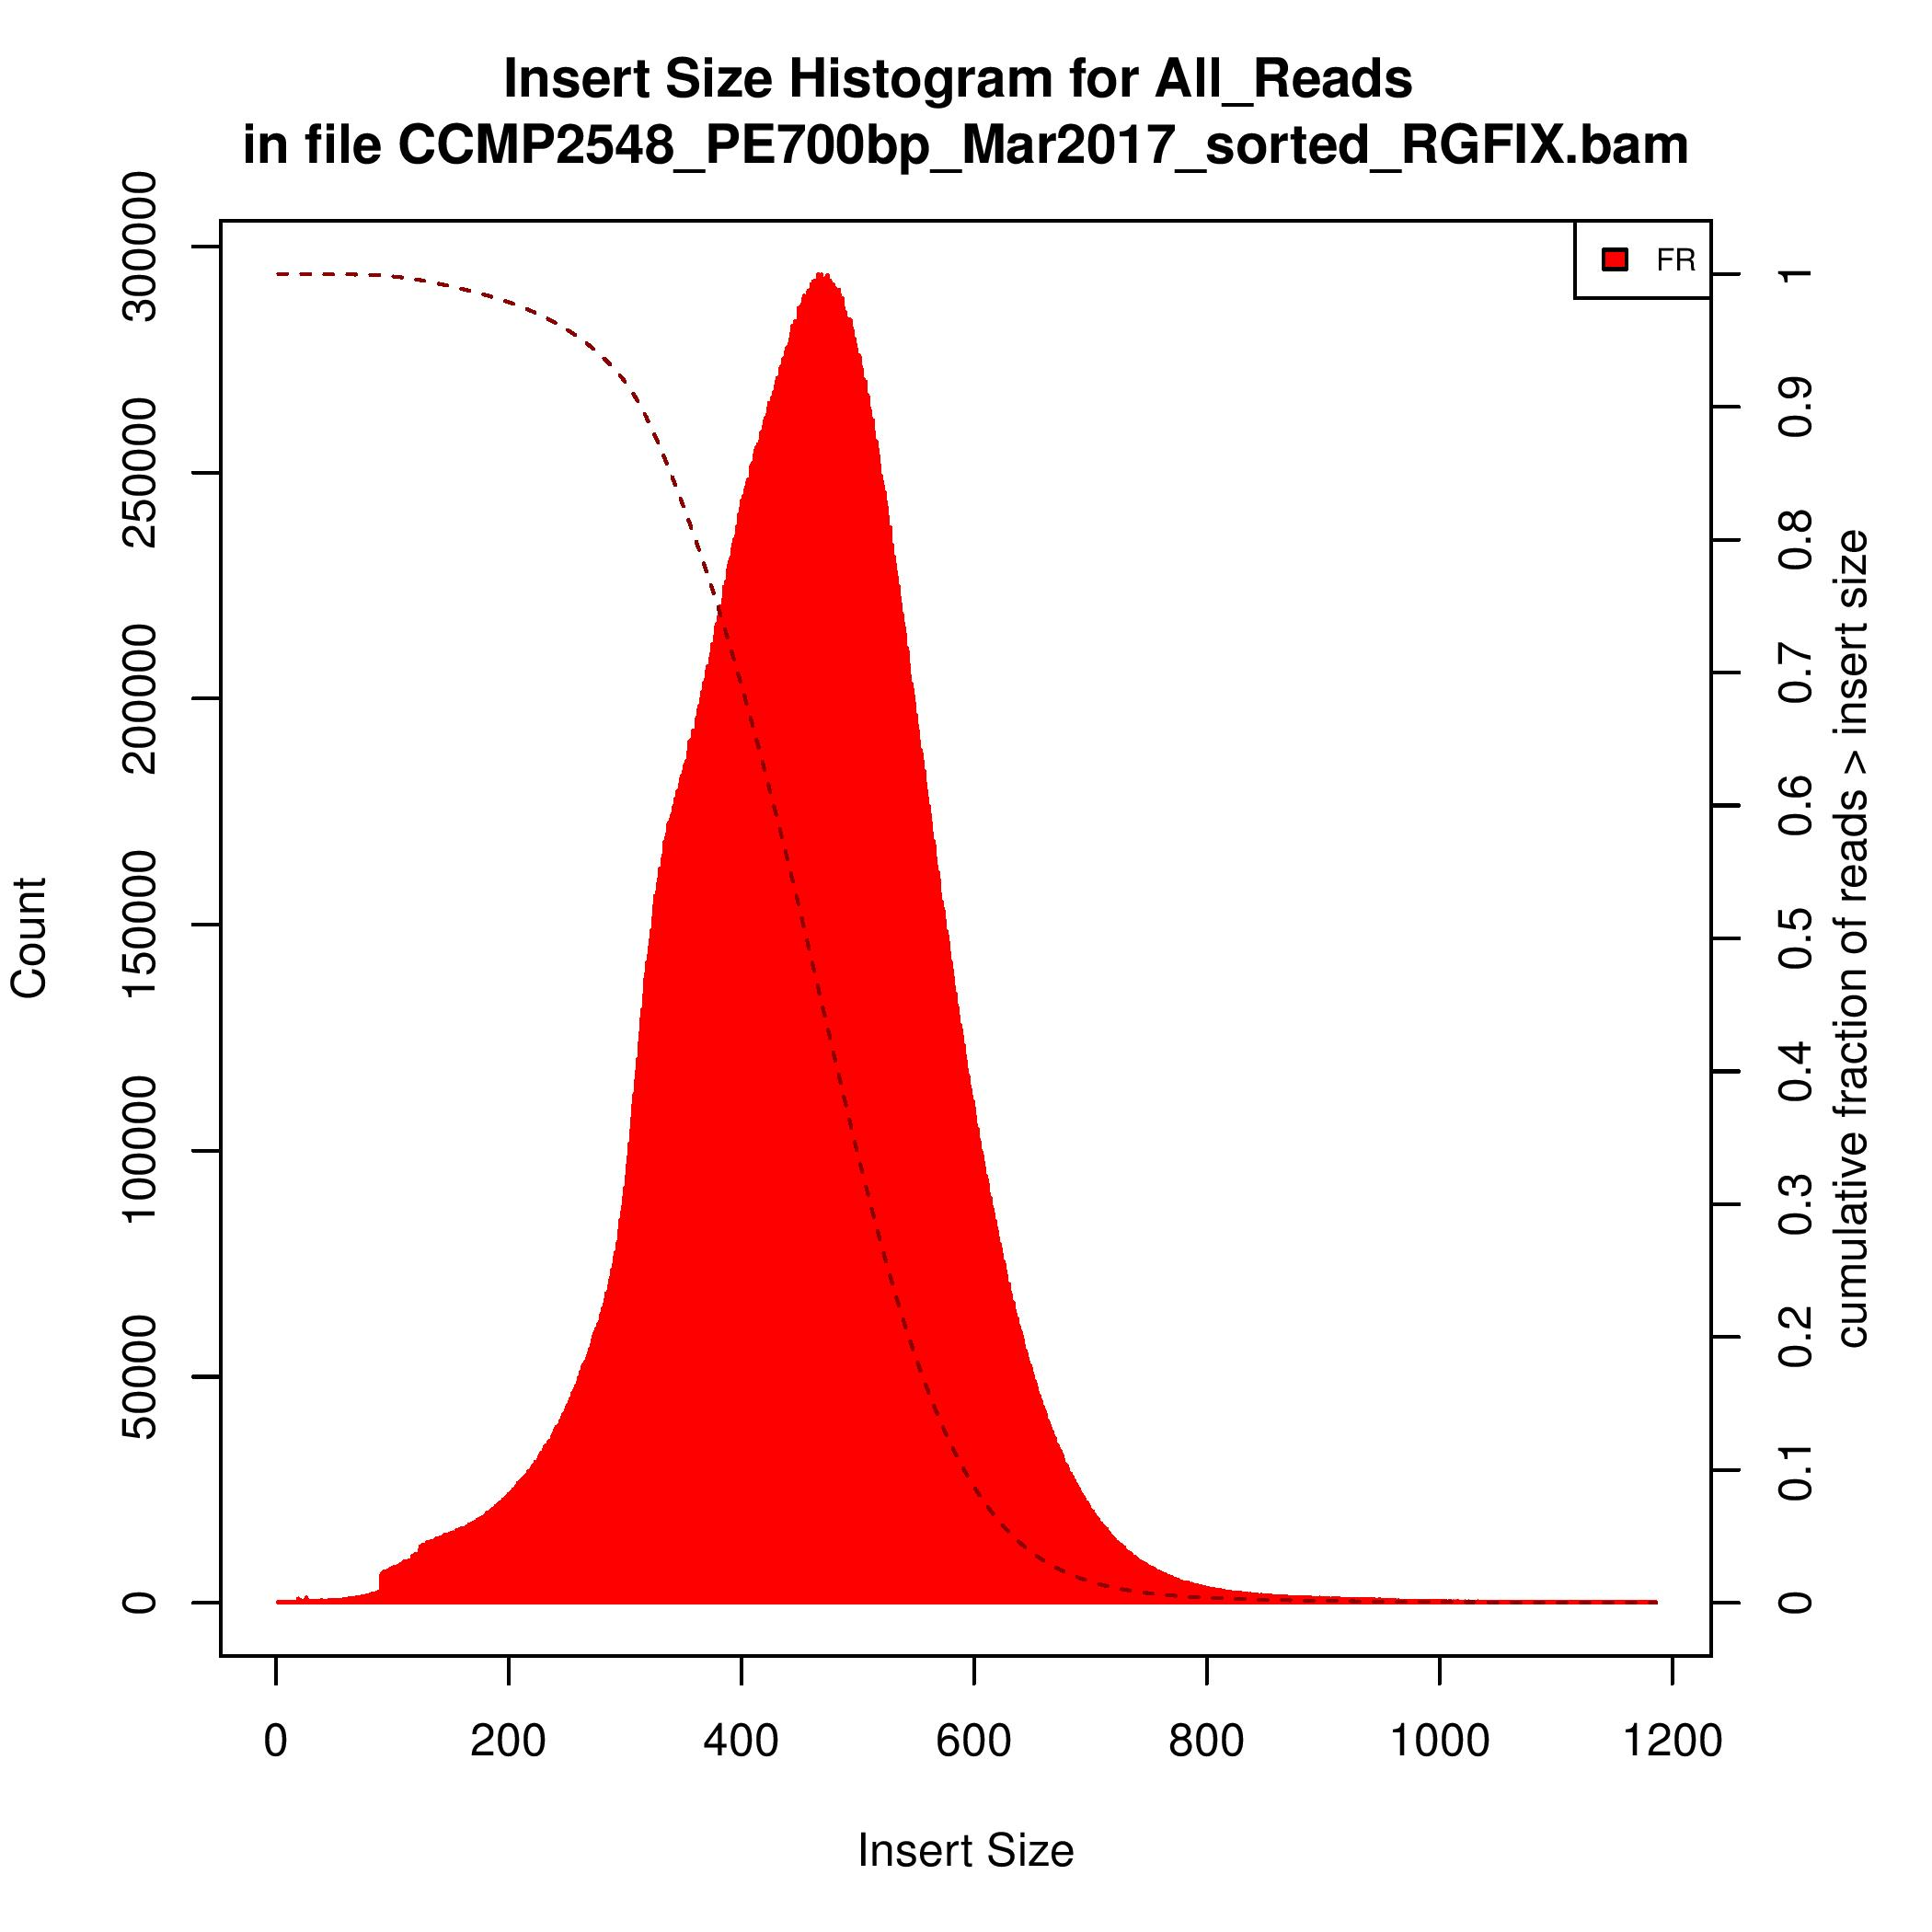

In [110]:
display(bp400_L6, bp400_L8, bp250_Jul, bp700_Apr, bp700_Dec, bp700_Mar)

# Duplicates Metrics
Metrics were collected after removing duplicates with Picard.

In [20]:
duplicate_metrics = pd.read_csv(PATH + '/metrics/formatted_CCMP2548_all_dedup_metrics.txt', sep='\t')

In [21]:
duplicate_metrics

,LIBRARY,UNPAIRED_READS_EXAMINED,READ_PAIRS_EXAMINED,SECONDARY_OR_SUPPLEMENTARY_RDS,UNMAPPED_READS,UNPAIRED_READ_DUPLICATES,READ_PAIR_DUPLICATES,READ_PAIR_OPTICAL_DUPLICATES,PERCENT_DUPLICATION,ESTIMATED_LIBRARY_SIZE
0,PE700DECMARAPR,1769696,365285780,13263386,2162740,902467,27872138,4440423,0.077350,2656855052
1,PE400APR,307409,35822131,1799074,9634785,80484,2620983,818032,0.073973,328029354
2,PE250JUL,415373,104296185,5506217,699621,117620,3184470,5377,0.031035,1675697688


In [27]:
print ("Percentage duplication for each library is; 700bp: {}, 400bp: {}, 250bp: {}".format(duplicate_metrics['PERCENT_DUPLICATION'][0],duplicate_metrics['PERCENT_DUPLICATION'][1],duplicate_metrics['PERCENT_DUPLICATION'][2]))

Percentage duplication for each library is; 700bp: 0.07735, 400bp: 0.073973, 250bp: 0.031035000000000004


Duplicate levels are reasonable, but 7% of reads will be lost which will impact our covertage. However given we had more than enough coverage earlier (see Jellyfish section, other notebook) this should be fine for variant calling.

# Analyze Covariate Results

These covariate plots were generated in R using GATK's Analyze Covariates script. Recall our *first pass* where error is calculated empirically, and patterns with how this error varies is recorded in a recalibration table. Quality scores are then recalibrated in the second pass. The covariates plots below assess how our quality scores have been altered by the recalibration. 

It's useful to compare these plots to what we would expect on an Illumina platform such as Hi-Seq to help identify any anomalous data (see the typical covariate plots for HiSeq in the image below)


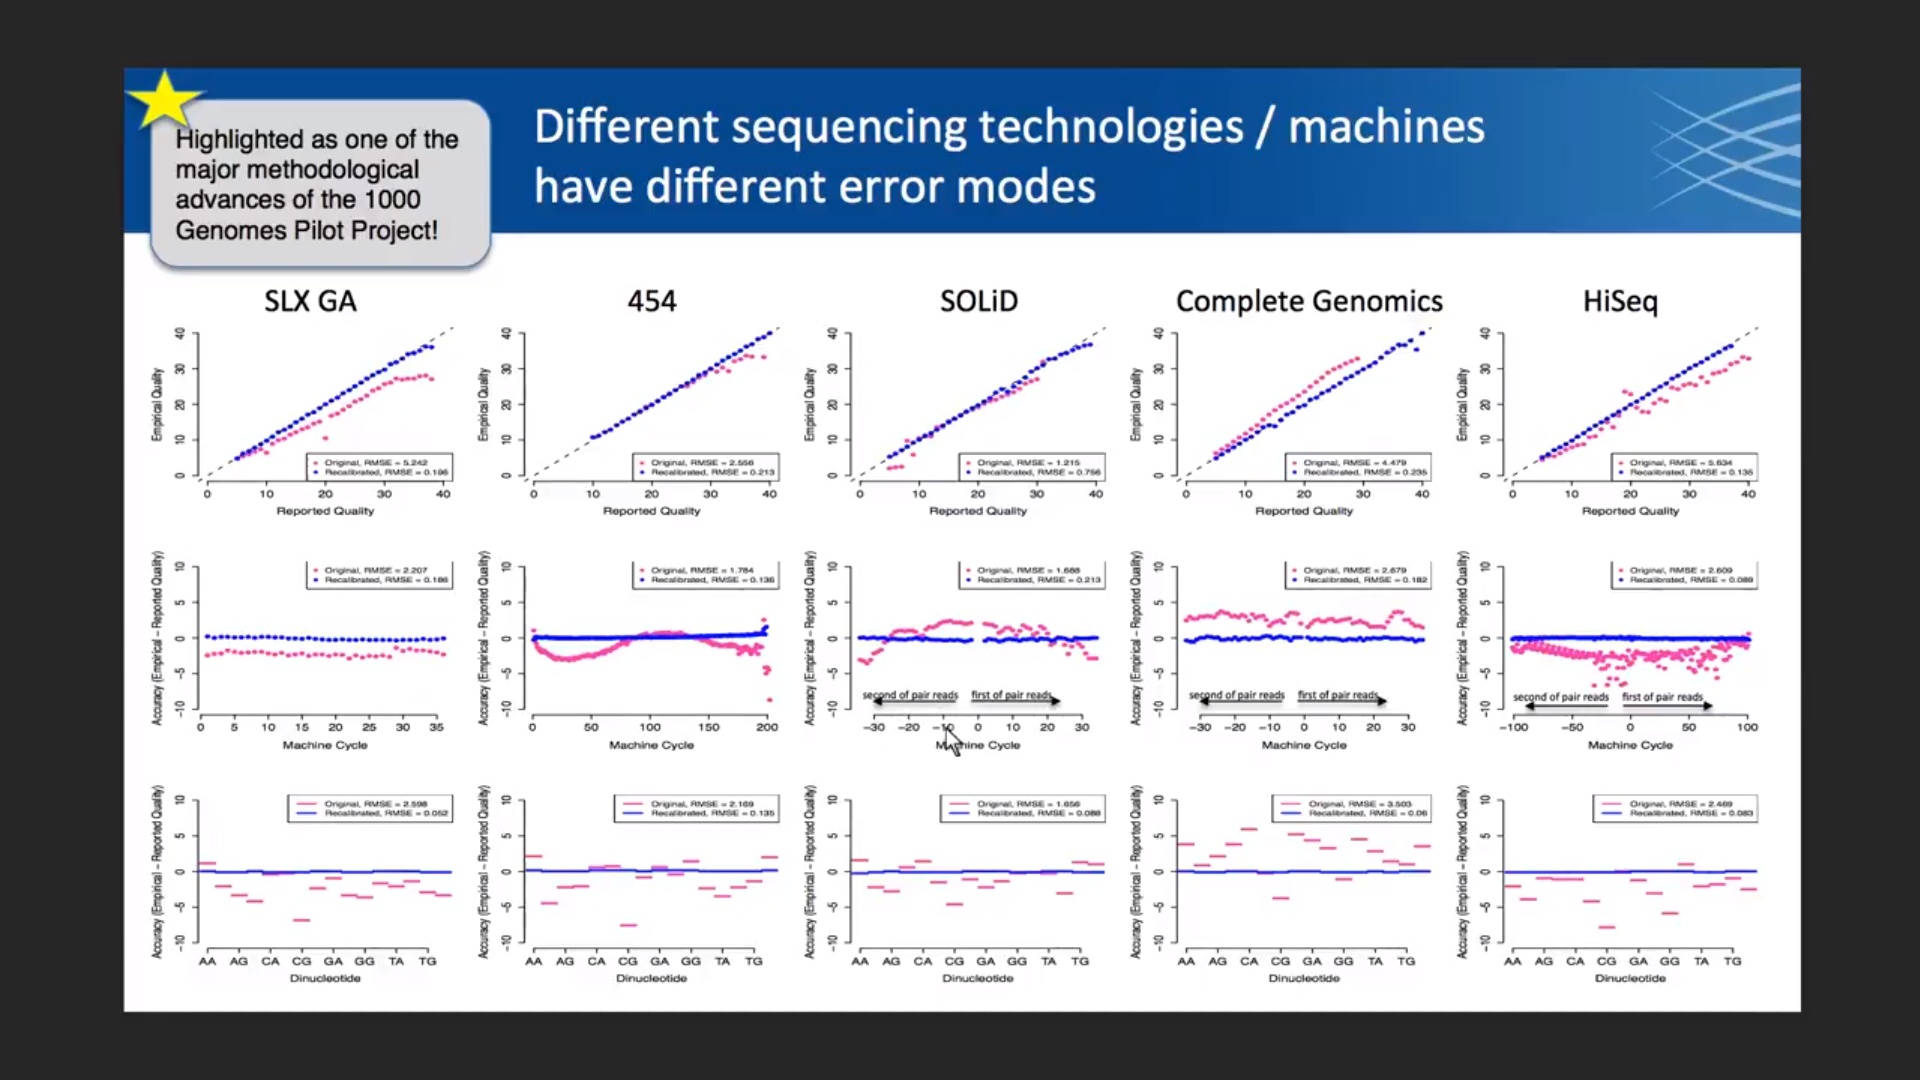

In [28]:
Image(filename = PATH + "/covariates_pic.png") #Our reads should recalibrate somewhat similary to the HiSeq set

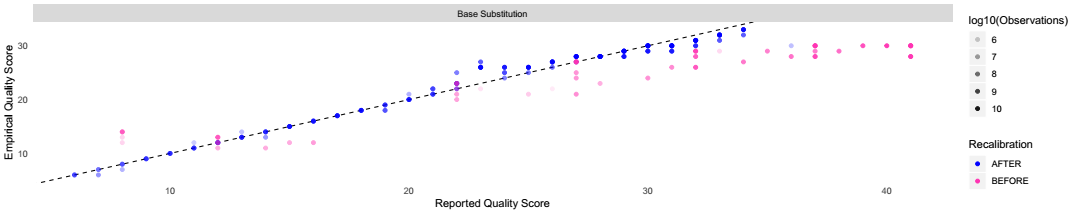

In [3]:
Image(filename = PATH + "/metrics/analyze_covariates/quality_score.png")

Above we can see that scores appear to have been reduced generally overall, this seems in line with HiSeq overreporting scores initially as well.

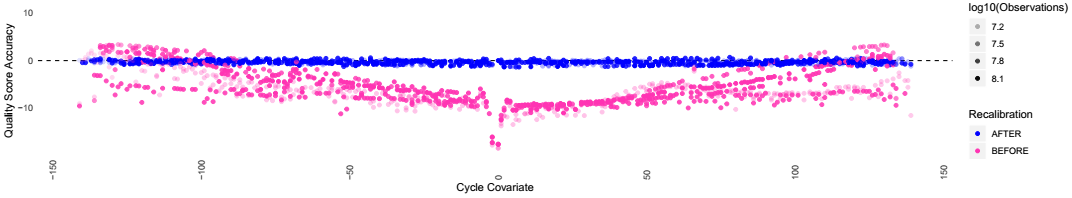

In [5]:
Image(filename = PATH + "/metrics/analyze_covariates/cycle_covariate.png")

Accuracy = empirical - reported e.g 'true' score is 30, but 40 was reported, accuracy would be 30-40 = -10

bases at the start of reads appear to be overreported, whereas ends more accurate.

    <--------------------------------------------                      ----------------------------------------->
                second of pair reads                                             first of pair reads  
                                                        (Above)

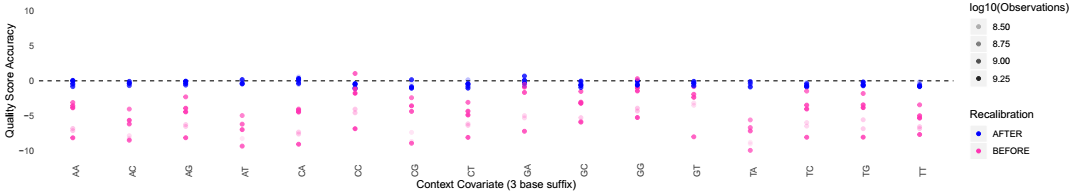

In [6]:
Image(filename = PATH + "/metrics/analyze_covariates/nt_context.png")

Again the quality scores are reduced in almost all nucleotide contexts, just by varying degrees.

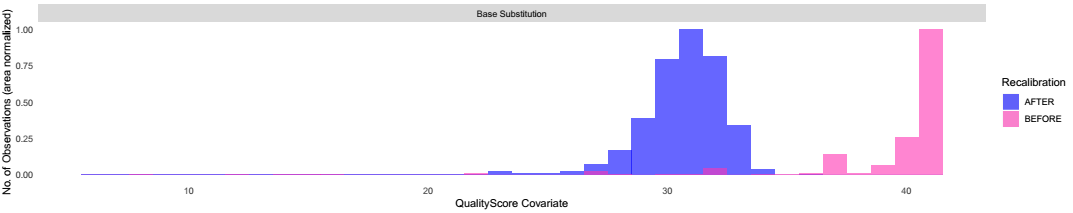

In [7]:
Image(filename = PATH + "/metrics/analyze_covariates/2_quality_score.png")

Above: Most quality scores have been reduced to PHRED quality scores of ~30. Recall this still corresponds to only 1 in 1000 being incorrect (i.e. 99.9% accurate)

In [29]:
overall_error_rates = pd.read_csv(PATH + '/metrics/analyze_covariates/overall_error_rates.csv')
overall_error_rates.set_index('Unnamed: 0', inplace=True)
overall_error_rates.dropna(inplace=True)
del overall_error_rates.index.name
overall_error_rates

,700bp December 2016,700bp March 2017,700bp April 2017,250bp July 2016,400bp April 2018 (Lane 6),400bp April 2018 (Lane 8)
ReadGroup,HGLFMBBXX:8,HGVVMBBXX:8,HHLL2BBXX:8,HM75TBCXX:2,HNW23BBXX:6,HNW23BBXX:8
EventType,M,M,M,M,M,M
EmpiricalQuality,29,29,29,29,27,27
EstimatedQReported,32.4,30.8,32.9,36.7,33.3,33.7
Observations,2.89E+10,1.87E+10,3.59E+10,2.67E+10,4.25E+09,4.30E+09
Errors,3.75E+07,2.53E+07,4.32E+07,3.37E+07,7.80E+06,8.07E+06


In [107]:
#Grab empirical and reported quality scores, and put them into a new dataframe
x = pd.to_numeric(overall_error_rates.loc['EmpiricalQuality'])
y= pd.to_numeric(overall_error_rates.loc['EstimatedQReported'])

d = {"Adjusted": x, "Reported": y}
new_df = pd.DataFrame(data=d)

#new_df #uncomment to view

From the quick comparative plot below we can see that in all libraries, mean base quality scores were reduced

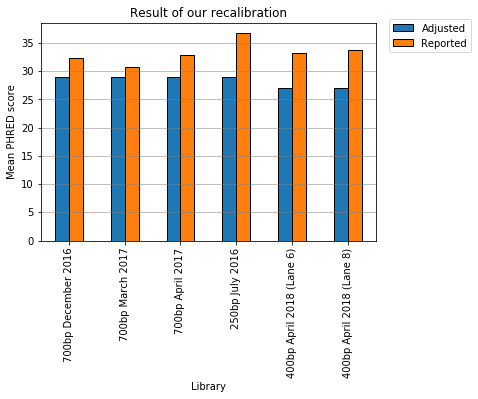

In [111]:
new_df.plot(kind='bar',title="Result of our recalibration", edgecolor="black")
plt.xlabel("Library")
plt.ylabel("Mean PHRED score")
plt.gca().yaxis.grid(which='both', linestyle='-', linewidth='0.5', color='grey')
plt.legend(bbox_to_anchor=(1.3, 1.04))

# SNP Statistics

After fully processing our reads through our variant calling profile we have a few metrics we want to look at.

In [112]:
summary_statistics = pd.read_csv(PATH + '/metrics/report.csv', header=None)
summary_statistics.columns = ["", "alignment_metrics_1", "alignment_metrics_2", "alignment_metrics_3",
                              "alignment_metrics_4", "alignment_metrics_5", "alignment_metrics_6",
                              "mean_insert_size", "raw_snps", "filtered_snps (PASS)", "raw_recalibrated_snps", 
                              "filtered_and_recalibrated_snps (PASS)", "avg_coverage"]
summary_statistics.set_index('', inplace=True)
del summary_statistics.index.name

In [116]:
summary_statistics.iloc[:,7:11] # Slice out only the most informative columns. These are plotted later

,raw_snps,filtered_snps (PASS),raw_recalibrated_snps,filtered_and_recalibrated_snps (PASS)
CCMP2548_all,455620,254023,440631,246404


In [117]:
print ("Average coverage = " + str(summary_statistics.iloc[0]['avg_coverage']))
#Average coverage estimated from samtools depth_out (Step 3 of the pipeline, after bwa read mapping and indexing)

Average coverage = 178.493


Above we can see our average coverage is really good, we would have been happy with 80-100 for our variant calling purposes.

We process our indel file in a similar way, although there's no need to calculate coverage twice so we don't do that again.

In [47]:
indel_statistics = pd.read_csv(PATH + '/metrics/indel_report.csv', header=None)
indel_statistics.columns = ["", "raw_indels", "filtered_indels (PASS)", "raw_recalibrated_indels", 
                              "filtered_and_recalibrated_indels (PASS)"]
indel_statistics.set_index('', inplace=True)
del indel_statistics.index.name
indel_statistics

,raw_indels,filtered_indels (PASS),raw_recalibrated_indels,filtered_and_recalibrated_indels (PASS)
CCMP2548_all,151078,120467,148585,119334


Below we combine our indel and SNP data into one dataframe

In [118]:
snp_indels = pd.read_csv(PATH + '/metrics/snp_indel_counts.csv')
snp_indels.set_index('Unnamed: 0', inplace=True)
del snp_indels.index.name
snp_indels

,raw,filtered,raw recalibrated,filtered and recalibrated
CCMP2548_snp_counts,455620,254023,440631,246404
CCMP2548_indel_counts,151078,120467,148585,119334


Below; 

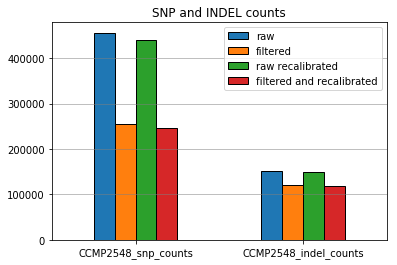

In [155]:
snp_indels.plot(kind='bar', title="SNP and INDEL counts", edgecolor="black")
plt.xticks(rotation=360)
plt.gca().yaxis.grid(which='both', linestyle='-', linewidth='0.5', color='grey')

In [125]:
final_snps = snp_indels['filtered and recalibrated'][0]
final_indels = snp_indels['filtered and recalibrated'][1]

print ("The data here provides evidence for {} well supported SNPs and {} indels within our CCMP2548 isolate".format(final_snps, final_indels)) 

The data here provides evidence for 246404 well supported SNPs and 119334 indels witin our CCMP2548 isolate


A quick analysis of some allele frequencies from our vcf file

In [129]:
my_df = pd.read_csv("haploid_vcf_table.tsv", sep="\t")
my_df.head()

,CHROM,POS,REF,ALT,FILTER,AF,DP,CCMP2548.GT,CCMP2548.AD,CCMP2548.PL,CCMP2548.GQ
0,scaffold1|size4977313,27235,C,G,PASS,1,974,G,"2,936","32854,0",99
1,scaffold1|size4977313,27245,T,G,PASS,1,909,G,"0,909","41760,0",99
2,scaffold1|size4977313,27246,G,C,PASS,1,900,C,"0,900","41445,0",99
3,scaffold1|size4977313,27255,A,T,PASS,1,806,T,"0,806","36720,0",99
4,scaffold1|size4977313,62962,T,A,PASS,1,2406,A,"0,2405","108607,0",99


In [132]:
my_df.dropna(axis=0, inplace=True) #drop rows with DP = NaN; not clear why these values are NaNs

### Allele distributtion

First we'll look at the DP field (Allele Depth)

Text(0.5,1,'Depth (DP) frequency')

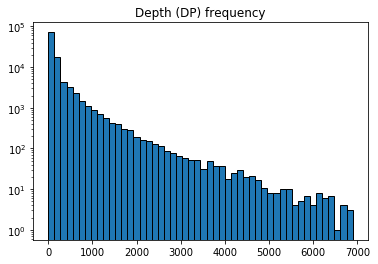

In [133]:
#DP histogram
plt.hist(my_df['DP'], log=True, bins=50, edgecolor='black')
plt.title("Depth (DP) frequency")

There seems to be many variants with quite low depth (the first bar (0-200)); so we'll take a closer look.

Text(0.5,1,'DP distribution for SNPs below DP=250')

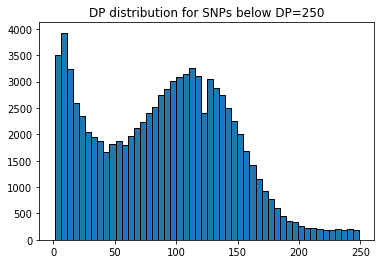

In [135]:
#Just a look at low DP SNPs
mask = my_df['DP'] < 250
low_df = my_df[mask]
plt.hist(low_df['DP'], bins=50, edgecolor='black')
plt.title("DP distribution for SNPs below DP=250")

Many of these seem low, but it's still ultimately the calculated genotype likelihoods (PL) that results in a variant call.

All the command-line tools and scripts that were written to obtain this data can be found in the other jupyter notebook; *CCMP2548 Script Summaries*. This is only an initial exploratory analysis, but the results are promising and suggest these SNPs and indels are well supported and reliable, at least in the context of the current reference genome assembly used for comparison.